In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston = load_boston();
print()
# x_org => 原始資料x  yt => 實際結果y
x_org, yt, feature_names = boston.data, boston.target, boston.feature_names;
print(f"原始資料 x_org => {x_org.shape}, yt => {yt.shape}")

x_data = x_org[:, feature_names == 'RM']

# x_data = np.hstack((x_data, x_org[:, feature_names == 'LSTAT']))
# x_data = np.hstack((x_data, x_org[:, feature_names == 'AGE']))
print(f"整理後: {x_data.shape}")


原始資料 x_org => (506, 13), yt => (506,)
整理後: (506, 1)


In [4]:
#在每筆x向量第1個位置插入1(虛擬變數)
x = np.insert(x_data, 0, 1.0, axis=1)

print(f"x => {x[:5]}")
print(f"yt => {yt[:5]}")

x => [[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]
yt => [24.  21.6 34.7 33.4 36.2]


In [5]:
#以預測函數 (1, x)之值計算預測值yp
def pred(x, w):
    return x@w

In [6]:
#初始化資料處理

#資料樣本總數=>M gj 輸入資料之維度(含虛擬變數)
M, D = x.shape

#運算次數
iters = 50000

#學習率
alpha = 0.01

#權重向量初始化
w = np.ones(D);

#紀錄評估結果(僅記錄損失含數值)
history = np.zeros((0,2))

In [7]:
#主程式

#迭代運算
for k in range(iters):
    #預測值
    yp = pred(x, w)
    
    #誤差
    yd = yp - yt
        
    #梯度下降法
    w = w - alpha * (x.T @ yd) / M
    
    #繪製學習曲線所需資料之運算與儲存
    if (k % 100 == 0):
        
        #計算損失函數值
        loss = np.mean(yd ** 2) / 2

        #紀錄計算結果
        history = np.vstack((history, np.array([k, loss])))
        
        #顯示畫面
        #print(f"iter = {k} , loss = {loss}")

In [8]:
print(f"損失函數初始值: {history[0,1]}")
print(f"損失函數最終值: {history[-1,1]}")

損失函數初始值: 154.22493384090907
損失函數最終值: 21.8003250713203


In [9]:
#計算繪製迴歸線所需之座標值

xall = x[:,1].ravel()
xl = np.array([[1, xall.min()], [1, xall.max()]])
yl = pred(xl, w)

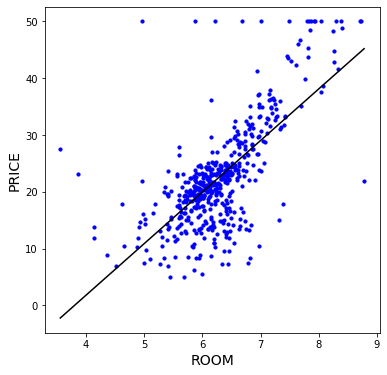

In [10]:
#繪製散布圖與迴歸線

plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(xl[:, 1], yl, c='k')
plt.show()

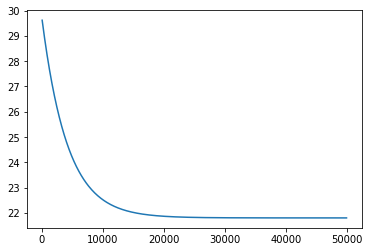

In [11]:
#繪製學習曲線(第一組除外)

plt.plot(history[1:, 0], history[1:,1])
plt.show()